In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
homes = pd.read_csv('data/homes.csv')
homes.head(10)


,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613
5,135,140,18,7,4,3,9,0.57,3028
6,150,160,20,8,4,3,18,4.00,3131
7,207,225,22,8,4,2,16,2.22,5158
8,271,285,30,10,5,2,30,0.53,5702
9,89,90,10,5,3,1,43,0.30,2054


In [3]:
homes.describe()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


The dataset is about housing, and the first thing I noticed was that the selling price is not in propostion to the taxes, hence I am assuming it is in thousands of dollars. The Rooms variable seems to be the total number of beds, baths, living room and kitchen. There are 50 observations in the dataset. 

In [4]:
homes['Sell'] = homes['Sell']*1000  # assuming the selling price is in thousands of dollars and scaling it so that its in proportion with the taxes


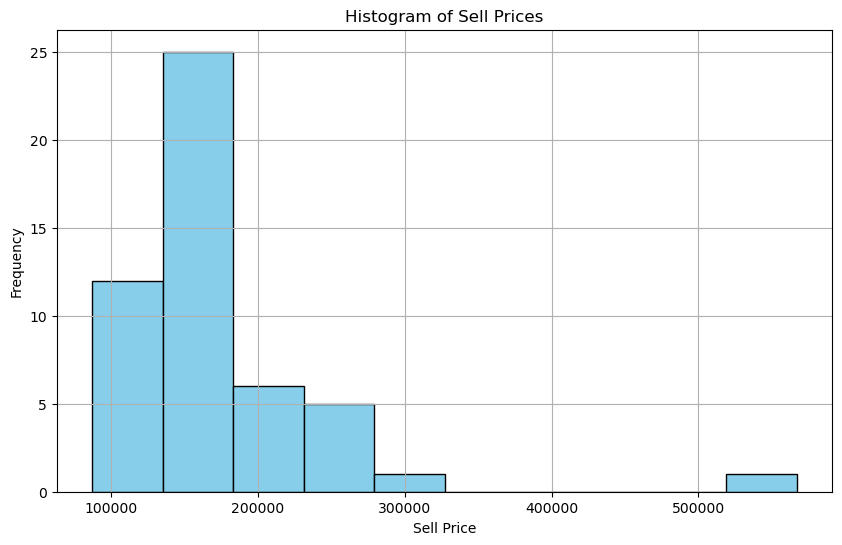

In [5]:
# EDA Technique 1: Histogram
plt.figure(figsize=(10, 6))
plt.hist(homes['Sell'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Sell Prices')
plt.xlabel('Sell Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



The purpose of this EDA is to analyze the distribution of selling price of houses. This would show us how the selling price is distributed across the dataset. We can see that the maximum selling price is around 150000 dollars. 

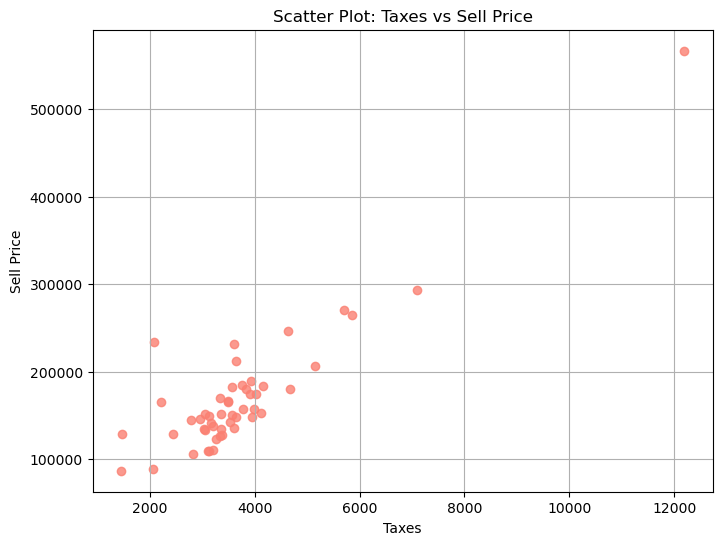

In [6]:
# EDA Technique 2: Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(homes[' "Taxes"'], homes['Sell'], color='salmon', alpha=0.8)
plt.title('Scatter Plot: Taxes vs Sell Price')
plt.xlabel('Taxes')
plt.ylabel('Sell Price')
plt.grid(True)
plt.show()



This is a scatter plot of selling price vs taxes. As pretty much expected we can see a positive linear trend where the taxes increase with the selling price which means a positive correlation. 

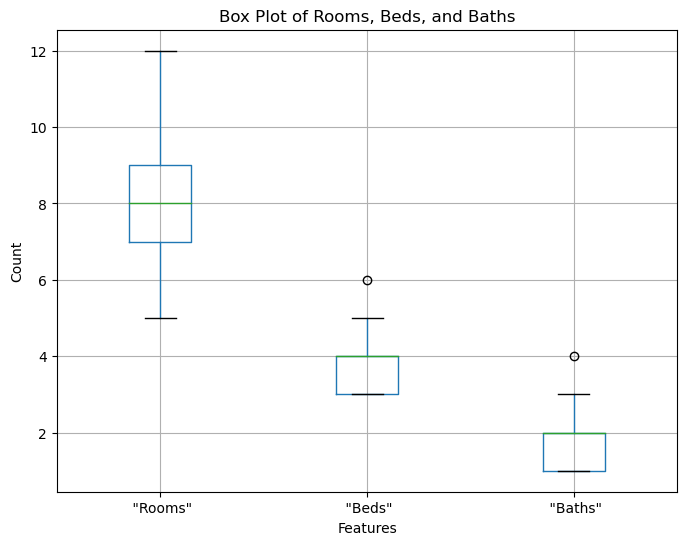

In [7]:
# EDA Technique 3: Box Plot
plt.figure(figsize=(8, 6))
homes[[' "Rooms"',' "Beds"',' "Baths"']].boxplot()
plt.title('Box Plot of Rooms, Beds, and Baths')
plt.ylabel('Count')
plt.xlabel('Features')
plt.grid(True)
plt.show()

This is a box plot for rooms, beds and baths to see the variation for these variables across the dataset. We can see that on an average, there are 8 rooms in total, 4 beds and 2 baths in the dataset. 

In [8]:
#fitting the model with taxes
X = homes[[' "Taxes"']]  
y = homes['Sell']      

# Create and fit the linear regression model
model1 = LinearRegression()
model1.fit(X, y)

# Display the model coefficients
print("Intercept:", model1.intercept_)
print("Coefficient for Taxes:", model1.coef_[0])

Intercept: 16871.87910246174
Coefficient for Taxes: 41.414997139186276


The intercept represents the value of the dependent variable (Selling Price) when all independent variables (Taxes) are set to zero. Even though there is a positive correlation between Taxes and Selling Price, we cannot say if it is a good indicator, because we can determine that from a small data set. We are also not considering the other variables in this regression. We need more data and more variables to say if the model is better or not.

In [9]:
model1.predict(X)[:10]
mean_squared_error(y,model1.predict(X))**0.5

31492.964512226576

In [10]:
#fitting the model with beds
X = homes[[' "Beds"']]  
y = homes['Sell']      

# Create and fit the linear regression model
model2 = LinearRegression()
model2.fit(X, y)

# Display the model coefficients
print("Intercept:", model2.intercept_)
print("Coefficient for Beds:", model2.coef_[0])

Intercept: 35526.09067579129
Coefficient for Beds: 35296.83490162532


In [11]:
model2.predict(X)[:10]
mean_squared_error(y,model2.predict(X))**0.5

67860.02652015143

The other variable that I have used instead of Taxes is Beds. Again, we cannot really say if any one of the two models is better because we are just using one variable for prediction and the observations in the dataset are pretty less. But if we had to compare the two models to each other, we can look at the Mean Squared Error value. For the model with Taxes as the predictor, the MSE value is less in comparison to the model with Beds as the predictor which means that that the first model is better than the second. 